## Questão 2

### Descritivo da Questão

* Considere novamente HTRU2 Data Set do site uci machine learning repository
(https://archive.ics.uci.edu/ml/datasets/HTRU2). No arquivo HTRU2.txt, CONSIDERE a variavel de classe
(os rotulos).

  a) Use validação cruzada estratificada “30 × 10-folds” para avaliar e comparar os 3 classificadores seguintes:
bayesiano gaussiano, Quando necessario, retire do conjunto de aprendizagem, um conjunto de validação
(20%) para fazer ajuste de hiper-parametros e depois treine o modelo novamente com o conjunto
aprendizagem + validação. Use amostragem estratificada.

  b) Obtenha uma estimativa pontual e um intervalo de confiança para cada metrica de avaliação do
classificador (Taxa de erro, precisão, cobertura, F-measure);

  c) Usar o Friedman test (teste não parametrico) para comparar os classificadores, e o pós teste (Nemenyi test)

* Considere os seguintes classificadores:

  i) Classificador bayesianos gaussiano:

     a) Use a estimativa de maxima verossimilhança para P(ωi)
     b) Para cada classe ωi (1 ≤ i ≤ 2) use a seguinte estimativa de máxima verossimilhança de p(xk|ωi) = p(xk|ωi, θi) , supondo uma normal multivariada:

  ii) Treine um classificador bayesiano baseado em janela de Parzen. Use a função de kernel multivariada produto com o mesmo h para todas as dimensões e a função de kernel Gaussiana unidimensional. Use conjunto de validação para fixar o parâmetro h.

  iii) Treine um classificador baseado em regressão logistica para cada classe e use a bordagem “um contra
todos" para classificar os exemplos.


### Pré-Processamento

In [ ]:
# Definição de bibliotecas iniciais
import pandas as pd
import numpy as np

#### Importação do dataset

É necessário criar uma pasta no ambiente do Google Colab denominada 'bases' com os seguintes arquivos .csv conforme a imagem a seguir

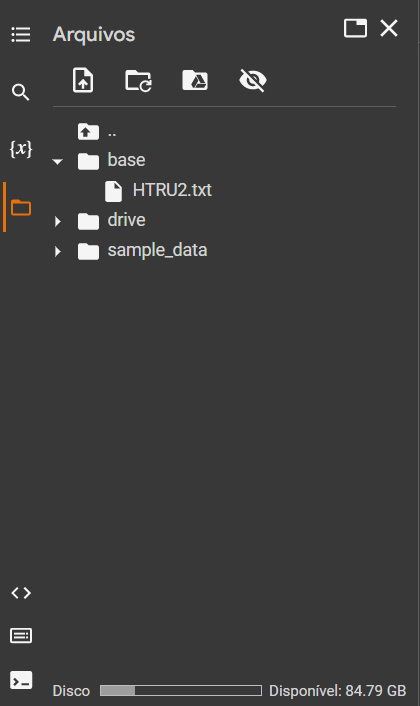

In [ ]:
# Importando a base

base = pd.read_csv('/content/base/HTRU2.txt', sep=',', header=None)

In [ ]:
base

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


#### Separação da base de dados em X e y

Iniciando a separação da base de dados em X e y:

In [ ]:
X = base.iloc[:,0:8]
y = base.iloc[:,-1]

In [ ]:
from google.colab import files
X.to_csv('X.csv') 
files.download('X.csv')

y.to_csv('y.csv') 
files.download('y.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Separação da base de dados em treinamento e teste

Separando os dados em treinamento e teste com auxílio da biblioteca do scikit learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 23)

In [ ]:
from google.colab import files
X_train.to_csv('X_train.csv') 
files.download('X_train.csv')

X_test.to_csv('X_test.csv') 
files.download('X_test.csv')

y_train.to_csv('y_train.csv') 
files.download('y_train.csv')

y_test.to_csv('y_test.csv') 
files.download('y_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Separação da base de dados em folds

Separação da base em 5 Folds para a obtenção dos hiperparâmetros

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv1 = RepeatedStratifiedKFold(n_repeats = 30, n_splits=5, random_state=23)

Separação da base em 10 Folds de forma estratificada considerando 30 repetições

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv2 = RepeatedStratifiedKFold(n_repeats = 30, n_splits=10, random_state=23)

### Funções auxiliares

Função para destrinchar uma matriz de acurácias em 10 modelos após a realização do RandomSearch

In [ ]:
def acuracia_kfolds (matriz_acuracias):
  acuracia_modelo_0 = matriz_acuracias.T[0].values
  acuracia_modelo_1 = matriz_acuracias.T[1].values
  acuracia_modelo_2 = matriz_acuracias.T[2].values
  acuracia_modelo_3 = matriz_acuracias.T[3].values
  acuracia_modelo_4 = matriz_acuracias.T[4].values
  acuracia_modelo_5 = matriz_acuracias.T[5].values
  acuracia_modelo_6 = matriz_acuracias.T[6].values
  acuracia_modelo_7 = matriz_acuracias.T[7].values
  acuracia_modelo_8 = matriz_acuracias.T[8].values
  acuracia_modelo_9 = matriz_acuracias.T[9].values
  return acuracia_modelo_0, acuracia_modelo_1, acuracia_modelo_2, acuracia_modelo_3, acuracia_modelo_4, acuracia_modelo_5, acuracia_modelo_6,acuracia_modelo_7,acuracia_modelo_8,acuracia_modelo_9

Função para o cálculo dos intervalos de confiança considerando a distribuição de T Student

In [ ]:
import scipy.stats as st

def define_confidence_interval(scores_accuracy, scores_precision, scores_recall, scores_f1, alpha):
  accuracy_interval = st.t.interval(alpha, len(scores_accuracy)-1, loc=np.mean(scores_accuracy), scale=st.sem(scores_accuracy))
  precision_interval = st.t.interval(alpha, len(scores_precision)-1, loc=np.mean(scores_precision), scale=st.sem(scores_precision))
  recall_interval = st.t.interval(alpha, len(scores_recall)-1, loc=np.mean(scores_recall), scale=st.sem(scores_recall))
  f1_interval = st.t.interval(alpha, len(scores_f1)-1, loc=np.mean(scores_f1), scale=st.sem(scores_f1))

  return accuracy_interval, precision_interval, recall_interval, f1_interval

Função para calcular a taxa e erro de cada classificador a partir dos valores de acurácia

In [ ]:
def error_tax_model (scores_model, interval_accuracy_model):
  error_tax_model = 1 - scores_model['test_accuracy'].mean()
  error_tax_lower_interval_model = error_tax_model - (scores_model['test_accuracy'].mean() - interval_accuracy_model[0]) 
  error_tax_upper_interval_model = error_tax_model + (interval_accuracy_model[1] - scores_model['test_accuracy'].mean())
  return error_tax_model, error_tax_lower_interval_model, error_tax_upper_interval_model


Função auxiliar para impressão dos parâmetros pontuais e intervalos na validação com intuito de evitar repetições

In [ ]:
def print_validation_evaluation (scores_model, accuracy_interval_model, precision_interval_model, recall_interval_model, f1_interval_model, error_tax_model, error_tax_lower_interval_model, error_tax_upper_interval_model):
  print('Relatório de estimativas pontuais e intervalo de confiança na validação:')
  print('\n')
  print('A acurácia obtida na validação foi de: %0.4f' % scores_model['test_accuracy'].mean())
  print(f'O intervalo de confiança da acurácia obtida na validação foi de: {accuracy_interval_model}')
  print('\n')
  print('A taxa de erro obtida na validação foi de: %0.4f' %  error_tax_model)
  print(f'O intervalo de confiança da acurácia obtida na validação foi de ({error_tax_lower_interval_model}, {error_tax_upper_interval_model})')
  print('\n')
  print('A precisão obtida na validação foi de: %0.4f' %scores_model['test_precision'].mean())
  print(f'O intervalo de confiança da precisão obtida na validação foi de: {precision_interval_model}')
  print('\n')
  print('A cobertura (recall) obtido na validação foi de: %0.4f' % scores_model['test_recall'].mean())
  print(f'O intervalo de confiança do recall obtida na validação foi de: {recall_interval_model}')
  print('\n')
  print('O f1-score obtido na validação foi de: %0.4f' % scores_model['test_f1'].mean())
  print(f'O intervalo de confiança do f1-score obtida na validação foi de: {f1_interval_model}')

Função para obtenção de métricas na predição dos modelos

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def test_evaluation(y_test, y_pred):
  error_tax_model = 1 - accuracy_score(y_test,y_pred)
  return accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred),confusion_matrix(y_test, y_pred), error_tax_model

Função auxiliar para impressão dos parâmetros pontuais no teste com intuito de evitar repetições

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def print_test_evaluation(y_test, y_pred, error_tax_model):
  print('Relatório de estimativas pontuais no teste:')
  print('\n')
  print('A acurácia obtida no teste foi de: %0.4f' % accuracy_score(y_test, y_pred))
  print('\n')
  print('A taxa de erro obtida no teste foi de: %0.4f' %error_tax_model)
  print('\n')
  print('A precisão obtida no teste foi de: %0.4f' %precision_score(y_test, y_pred))
  print('\n')
  print('O recall obtido no teste foi de: %0.4f' % recall_score(y_test, y_pred))
  print('\n')
  print('O f1-score obtido no teste foi de: %0.4f' % f1_score(y_test, y_pred))
  print('\n')

### Classificador Bayesiano Gaussiano

Para aplicar o classificador bayesiano gaussiano foi considerada a função Gaussian NB do pacote scikit learn que já implementa o algoritmo considerando a estimativa por máxima verossimilhança como descrito em https://scikit-learn.org/stable/modules/naive_bayes.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

#### Seleção de Melhor Modelo

**Definição do dicionário para hiperparâmetros do classificador Bayesiano Gaussiano**

Para a definição do dicionário que foi utilizado na função RandomizedSearchCV foram levados em considerações as informações da função GaussianNB:

Para explicar os parâmetros utilizados e o que foi considerado na criação do dicionário para escolha dos hiperparâmetros:

**prior**: parâmetro que indica a probabilidade a priore das classes. Como não é especificado foi considerado o default None;

**var_smoothing**: parâmetro que representa a porção de maior variância de todos os parâmetros que deve ser adicionada para o cálculo de estabilidade. Como o default da função é 1e-09, foi considerado na busca parâmetros entre 1e-4 a 1e-15 ;


In [ ]:
from scipy.stats import randint

gnb_params = {
    'var_smoothing': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15],
}

Para determinar os hiperparâmetros a serem utilizados no regressor linear será realizado um RandomSearch com a função RandomizedSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

search_gnb = RandomizedSearchCV(gnb, gnb_params, n_iter=10, n_jobs=-1, scoring='accuracy', cv=cv1, random_state = 23)

##### Treinamento

Para fazer o treinamento da base e encontrar o melhor modelo, foi utilizada a função fit:

In [ ]:
results_gnb = search_gnb.fit(X_train, y_train)

Para poder selecionar o melhor modelo, foi avaliada a validação de cada um dos modelos gerados

In [ ]:
results_val_gnb = pd.DataFrame(results_gnb.cv_results_)
results_val_gnb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split143_test_score,split144_test_score,split145_test_score,split146_test_score,split147_test_score,split148_test_score,split149_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008567,0.002787,0.003528,0.001292,0.0,{'var_smoothing': 1e-10},0.944483,0.945880,0.949022,0.942368,...,0.948655,0.943765,0.948324,0.947277,0.951466,0.942717,0.939923,0.945986,0.004201,2
1,0.008896,0.002683,0.003735,0.001679,0.0001,{'var_smoothing': 0.0001},0.945182,0.944483,0.945531,0.942019,...,0.947607,0.943067,0.948324,0.947277,0.947975,0.944464,0.936081,0.944715,0.003970,9
2,0.007935,0.001644,0.003346,0.001246,0.00001,{'var_smoothing': 1e-05},0.945531,0.943436,0.947626,0.943765,...,0.947607,0.944115,0.949022,0.948673,0.950070,0.943765,0.937827,0.945914,0.004099,8
3,0.007821,0.001869,0.003208,0.000957,0.0,{'var_smoothing': 1e-13},0.944483,0.945880,0.949022,0.942368,...,0.948655,0.943765,0.948324,0.947277,0.951466,0.942717,0.939923,0.945986,0.004201,2
4,0.008594,0.002197,0.003560,0.001345,0.0,{'var_smoothing': 1e-15},0.944483,0.945880,0.949022,0.942368,...,0.948655,0.943765,0.948324,0.947277,0.951466,0.942717,0.939923,0.945986,0.004201,2
5,0.008995,0.003196,0.003760,0.001497,0.0,{'var_smoothing': 1e-07},0.944483,0.945531,0.949022,0.942368,...,0.948306,0.943765,0.948673,0.947277,0.951816,0.942717,0.939923,0.945986,0.004213,7
6,0.007851,0.001798,0.003177,0.000598,0.0,{'var_smoothing': 1e-08},0.944483,0.945880,0.949022,0.942368,...,0.948655,0.943765,0.948324,0.947277,0.951466,0.942717,0.939923,0.945989,0.004194,1
7,0.008753,0.002586,0.003745,0.001437,0.001,{'var_smoothing': 0.001},0.940293,0.938547,0.941690,0.935382,...,0.944115,0.936081,0.943087,0.942039,0.941341,0.937827,0.931890,0.939265,0.004023,10
8,0.008775,0.002304,0.003711,0.001439,0.0,{'var_smoothing': 1e-14},0.944483,0.945880,0.949022,0.942368,...,0.948655,0.943765,0.948324,0.947277,0.951466,0.942717,0.939923,0.945986,0.004201,2
9,0.007573,0.001566,0.003176,0.000909,0.0,{'var_smoothing': 1e-12},0.944483,0.945880,0.949022,0.942368,...,0.948655,0.943765,0.948324,0.947277,0.951466,0.942717,0.939923,0.945986,0.004201,2


In [ ]:
acuracia_modelos_gnb = results_val_gnb.iloc[:,-153:-3]

In [ ]:
acuracia_gnb_m0, acuracia_gnb_m1, acuracia_gnb_m2, acuracia_gnb_m3, acuracia_gnb_m4, acuracia_gnb_m5, acuracia_gnb_m6, acuracia_gnb_m7, acuracia_gnb_m8, acuracia_gnb_m9  = acuracia_kfolds(acuracia_modelos_gnb )

Para verificar se as acurácias encontradas pelos modelos são estatisticamente iguais foi utilizada a estatística de Kruskal-Wallis para verificar se o valor da mediana de todas as acurácias são iguais

In [ ]:
from scipy import stats

stats.kruskal(acuracia_gnb_m0, acuracia_gnb_m1, acuracia_gnb_m2, acuracia_gnb_m3, acuracia_gnb_m4, acuracia_gnb_m5, acuracia_gnb_m6, acuracia_gnb_m7, acuracia_gnb_m8, acuracia_gnb_m9)

KruskalResult(statistic=235.8412979151999, pvalue=9.673965102578152e-46)

Como o p-valor encontrado foi menor do que 0.05, há evidências que recusa a hipótese nula e indica que os 10 modelos não obtiveram acurácias semelhantes.

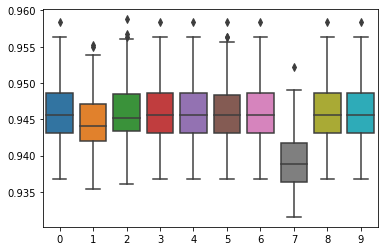

In [ ]:
import seaborn as sns

sns.boxplot(data=acuracia_modelos_gnb.T);

Com isso, é possível ver que o melhor modelo foi o modelo 6, mas que a variação no parâmetro var_smoothing não apresentou grandes oscilações.

In [ ]:
results_gnb.best_params_

{'var_smoothing': 1e-08}

In [ ]:
results_gnb.best_score_

0.9459887224207136

##### Melhor Modelo

Melhor modelo obtido foi salvo como gnb_model

In [ ]:
gnb_model = GaussianNB(var_smoothing=1e-8)

##### Estimativas pontuais e intervalo de confiança da validação

In [ ]:
scoring=['accuracy', 'precision', 'recall', 'f1']

In [ ]:
from sklearn.model_selection import cross_validate

scores_gnb=cross_validate(gnb_model, X_train, y_train, cv=cv2,scoring=scoring)

In [ ]:
scores_gnb.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

In [ ]:
scores_gnb['test_accuracy'].mean()

0.9459864766210292

Para calcular os intervalos de confiança

In [ ]:
int_acuracia_gnb, int_precisao_gnb, int_recall_gnb, int_f1_gnb = define_confidence_interval(scores_gnb['test_accuracy'], scores_gnb['test_precision'], scores_gnb['test_recall'], scores_gnb['test_f1'], 0.95)

In [ ]:
error_tax_gnb, error_tax_lower_interval_gnb, error_tax_upper_interval_gnb = error_tax_model(scores_gnb, int_acuracia_gnb)

Relatório de estimativas de validação

In [ ]:
print('Relatório referente a validação do classificador Bayesiano Gaussiano')

print_validation_evaluation(scores_gnb, int_acuracia_gnb, int_precisao_gnb, int_recall_gnb, int_f1_gnb, error_tax_gnb, error_tax_lower_interval_gnb, error_tax_upper_interval_gnb)

Relatório referente a validação do classificador Bayesiano Gaussiano
Relatório de estimativas pontuais e intervalo de confiança na validação:


A acurácia obtida na validação foi de: 0.9460
O intervalo de confiança da acurácia obtida na validação foi de: (0.9453171578724642, 0.9466557953695942)


A taxa de erro obtida na validação foi de: 0.0540
O intervalo de confiança da acurácia obtida na validação foi de (0.05334420463040579, 0.054682842127535825)


A precisão obtida na validação foi de: 0.6591
O intervalo de confiança da precisão obtida na validação foi de: (0.6557186347381206, 0.6625213108274238)


A cobertura (recall) obtido na validação foi de: 0.8537
O intervalo de confiança do recall obtida na validação foi de: (0.850175986143053, 0.8572871952895941)


O f1-score obtido na validação foi de: 0.7434
O intervalo de confiança do f1-score obtida na validação foi de: (0.7406156192028536, 0.7462702549468435)


#### Predição

Realizando a predição com o conjunto de teste (X_test)

In [ ]:
y_pred_gnb = search_gnb.predict(X_test)

##### Métricas de erro do teste

In [ ]:
acuracia_gnb, precisao_gnb, recall_gnb, f1_score_gnb, matriz_confusao_gnb, error_gnb = test_evaluation(y_test, y_pred_gnb)

In [ ]:
print('Relatório referente ao do classificador Bayesiano Gaussiano')

print_test_evaluation(y_test, y_pred_gnb, error_gnb)

Relatório referente ao do classificador Bayesiano Gaussiano
Relatório de estimativas pontuais no teste:


A acurácia obtida no teste foi de: 0.9430


A taxa de erro obtida no teste foi de: 0.0570


A precisão obtida no teste foi de: 0.6490


O recall obtido no teste foi de: 0.8232


O f1-score obtido no teste foi de: 0.7258




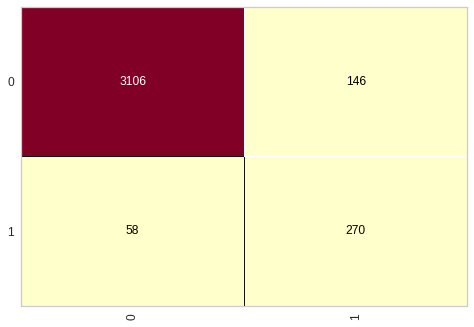

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

confusion_matrix_gnb = ConfusionMatrix(gnb_model)
confusion_matrix_gnb.fit(X_train, y_train);
confusion_matrix_gnb.score(X_test, y_test);

De forma estruturada, utilizamos a função classification_report:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3252
           1       0.65      0.82      0.73       328

    accuracy                           0.94      3580
   macro avg       0.82      0.89      0.85      3580
weighted avg       0.95      0.94      0.95      3580



### Classificador Bayesiano baseado na janela de Parzen


Para a construção do classificador bayesiano baseado na janela de Parzen, foi utilizado como referência: 

https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

Inicialmente foi implementada a classe KDEClassifier disponível no github citado

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity

class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

Explicando em mais detalhes a classe implementada:

* BaseEstimator copia o estimador que será utilizado no procedimento de cross-validation
* ClassifierMixin define o método de avaliação que será utilizado

Sobre a inicialização do método:

* Define uma largura de banda e qual kernel será utilizado, que nesse caso é o gaussiano

In [ ]:
parzen = KDEClassifier()

##### Seleção de Melhor Modelo

**Definição do dicionário para hiperparâmetros do classificador Bayesiano baseado na janela de Parzen**

Para a definição do dicionário que foi utilizado na função RandomizedSearchCV foram levados em considerações as informações da classe KDEClassifier:

In [ ]:
from scipy.stats import randint

parzen_params = {
    'bandwidth': 10**np.linspace(-1,1,100),
}

Para determinar os hiperparâmetros a serem utilizados no regressor linear será realizado um RandomSearch com a função RandomizedSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

search_parzen = RandomizedSearchCV(parzen, parzen_params, n_iter=10, n_jobs=-1, scoring='accuracy', cv=cv1, random_state = 23)

###### Treinamento

Para fazer o treinamento da base e encontrar o melhor modelo, foi utilizada a função fit:

In [ ]:
from sklearn.neighbors import KernelDensity

In [ ]:
results_parzen = search_parzen.fit(X_train, y_train)

O fit com parzen durou 30 min

Para poder selecionar o melhor modelo, foi avaliada a validação de cada um dos modelos gerados

In [ ]:
results_val_parzen = pd.DataFrame(results_parzen.cv_results_)
results_val_parzen

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bandwidth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split143_test_score,split144_test_score,split145_test_score,split146_test_score,split147_test_score,split148_test_score,split149_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026411,0.004343,1.869042,0.045900,0.33516,{'bandwidth': 0.33516026509388425},0.946927,0.954260,0.957402,0.951100,...,0.952497,0.948306,0.955307,0.961243,0.945880,0.950052,0.950402,0.953471,0.003413,7
1,0.025127,0.002278,3.339478,0.051375,4.132012,{'bandwidth': 4.132012400115339},0.968575,0.970321,0.978003,0.972057,...,0.973804,0.968215,0.973464,0.974511,0.972416,0.977646,0.964373,0.972759,0.002608,2
2,0.025028,0.002233,3.438810,0.057575,4.534879,{'bandwidth': 4.5348785081285845},0.969274,0.970321,0.977654,0.972057,...,0.973804,0.968914,0.974162,0.973813,0.972416,0.977995,0.965072,0.972908,0.002600,1
3,0.024783,0.002021,2.795143,0.052840,2.364489,{'bandwidth': 2.3644894126454084},0.966480,0.968226,0.975908,0.970311,...,0.972407,0.967517,0.972416,0.974860,0.970321,0.973804,0.965072,0.971297,0.002512,4
4,0.025517,0.003887,3.171749,0.054278,3.593814,{'bandwidth': 3.5938136638046276},0.969274,0.970670,0.977304,0.970311,...,0.972756,0.968215,0.973115,0.974162,0.972416,0.976947,0.964373,0.972671,0.002628,3
5,0.024808,0.002461,2.152409,0.059576,0.559081,{'bandwidth': 0.5590810182512224},0.948324,0.961941,0.963687,0.958086,...,0.961229,0.955292,0.962291,0.962291,0.953911,0.958086,0.955641,0.958812,0.003166,6
6,0.024720,0.002460,1.068190,0.044808,0.114976,{'bandwidth': 0.11497569953977356},0.917249,0.918296,0.921089,0.917220,...,0.915823,0.912679,0.918645,0.923534,0.916201,0.913727,0.917220,0.918590,0.003384,10
7,0.025157,0.003689,2.467918,0.056439,1.29155,{'bandwidth': 1.291549665014884},0.959148,0.965084,0.972416,0.966119,...,0.966469,0.962277,0.970321,0.970321,0.964735,0.966818,0.961229,0.966040,0.002709,5
8,0.024847,0.002947,1.701998,0.053922,0.253536,{'bandwidth': 0.2535364493970112},0.944483,0.946927,0.953561,0.947258,...,0.948655,0.943067,0.946229,0.958799,0.942039,0.941320,0.943416,0.948638,0.003584,8
9,0.024835,0.003000,1.601234,0.062743,0.220513,{'bandwidth': 0.22051307399030456},0.945880,0.942388,0.950768,0.940971,...,0.942717,0.940971,0.945182,0.953561,0.940642,0.937478,0.941320,0.944548,0.003715,9


In [ ]:
acuracia_modelos_parzen = results_val_parzen.iloc[:,-153:-3]

In [ ]:
acuracia_parzen_m0, acuracia_parzen_m1, acuracia_parzen_m2, acuracia_parzen_m3, acuracia_parzen_m4, acuracia_parzen_m5, acuracia_parzen_m6, acuracia_parzen_m7, acuracia_parzen_m8, acuracia_parzen_m9  = acuracia_kfolds(acuracia_modelos_parzen)

Para verificar se as acurácias encontradas pelos modelos são estatisticamente iguais foi utilizada a estatística de Kruskal-Wallis para verificar se o valor da mediana de todas as acurácias são iguais

In [ ]:
from scipy import stats

stats.kruskal(acuracia_parzen_m0, acuracia_parzen_m1, acuracia_parzen_m2, acuracia_parzen_m3, acuracia_parzen_m4, acuracia_parzen_m5, acuracia_parzen_m6, acuracia_parzen_m7, acuracia_parzen_m8, acuracia_parzen_m9)

KruskalResult(statistic=1361.2898490697098, pvalue=1.7843444741382027e-287)

Como o p-valor encontrado foi menor do que 0.05, há evidências que recusa a hispótese nula e indica que os 10 modelos não obtiveram acurácias semelhantes.

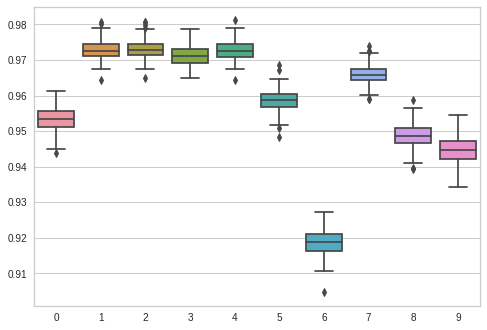

In [ ]:
import seaborn as sns

sns.boxplot(data=acuracia_modelos_parzen.T);

Com isso, é possível ver que o melhor modelo foi o modelo 2.

In [ ]:
results_parzen.best_params_

{'bandwidth': 4.5348785081285845}

In [ ]:
results_parzen.best_score_

0.9729082662896741

###### Melhor Modelo

In [ ]:
parzen_model = KDEClassifier(bandwidth = 4.5348785081285845)

###### Estimativas pontuais e intervalo de confiança da validação

In [ ]:
scoring=['accuracy', 'precision', 'recall', 'f1']

In [ ]:
from sklearn.model_selection import cross_validate

scores_parzen=cross_validate(parzen_model, X_train, y_train, cv=cv2,scoring=scoring)

In [ ]:
scores_parzen.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

In [ ]:
scores_parzen['test_accuracy'].mean()

0.9729757940365439

Para calcular os intervalos de confiança

In [ ]:
int_acuracia_parzen, int_precisao_parzen, int_recall_parzen, int_f1_parzen = define_confidence_interval(scores_parzen['test_accuracy'], scores_parzen['test_precision'], scores_parzen['test_recall'], scores_parzen['test_f1'], 0.95)

In [ ]:
error_tax_parzen, error_tax_lower_interval_parzen, error_tax_upper_interval_parzen = error_tax_model(scores_parzen, int_acuracia_parzen)

Relatório de estimativas de validação

In [ ]:
print('Relatório a respeito da validação do classificador Bayesiano baseado na janela de Parzen \n')

print_validation_evaluation(scores_parzen, int_acuracia_parzen, int_precisao_parzen, int_recall_parzen, int_f1_parzen, error_tax_parzen, error_tax_lower_interval_parzen, error_tax_upper_interval_parzen)

Relatório a respeito da validação do classificador Bayesiano baseado na janela de Parzen 

Relatório de estimativas pontuais e intervalo de confiança na validação:


A acurácia obtida na validação foi de: 0.9730
O intervalo de confiança da acurácia obtida na validação foi de: (0.9725288202546628, 0.973422767818425)


A taxa de erro obtida na validação foi de: 0.0270
O intervalo de confiança da acurácia obtida na validação foi de (0.02657723218157504, 0.027471179745337193)


A precisão obtida na validação foi de: 0.9155
O intervalo de confiança da precisão obtida na validação foi de: (0.9128318646019432, 0.9182282589246237)


A cobertura (recall) obtido na validação foi de: 0.7769
O intervalo de confiança do recall obtida na validação foi de: (0.7727638948050044, 0.781129234965988)


O f1-score obtido na validação foi de: 0.8400
O intervalo de confiança do f1-score obtida na validação foi de: (0.8371770165164664, 0.8429007938006338)


#### Predição

Realizando a predição com o conjunto de teste (X_test)

In [ ]:
y_pred_parzen = search_parzen.predict(X_test)

##### Métricas de erro do teste

In [ ]:
acuracia_parzen, precisao_parzen, recall_parzen, f1_score_parzen, matriz_confusao_parzen, error_parzen = test_evaluation(y_test, y_pred_parzen)

In [ ]:
print('Relatório a respeito do teste do classificador Bayesiano baseado na janela de Parzen \n')

print_test_evaluation(y_test, y_pred_parzen, error_parzen)

Relatório a respeito do teste do classificador Bayesiano baseado na janela de Parzen 

Relatório de estimativas pontuais no teste:


A acurácia obtida no teste foi de: 0.9715


A taxa de erro obtida no teste foi de: 0.0285


A precisão obtida no teste foi de: 0.9346


O recall obtido no teste foi de: 0.7409


O f1-score obtido no teste foi de: 0.8265




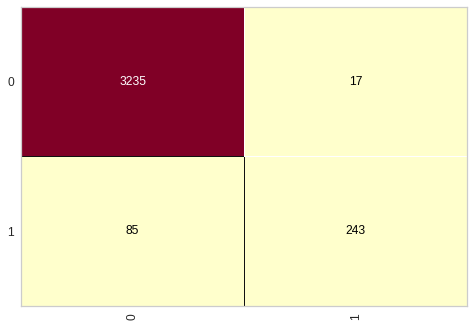

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

confusion_matrix_parzen = ConfusionMatrix(parzen_model)
confusion_matrix_parzen.fit(X_train, y_train);
confusion_matrix_parzen.score(X_test, y_test);

De forma estruturada, utilizamos a função classification_report:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred_parzen))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3252
           1       0.93      0.74      0.83       328

    accuracy                           0.97      3580
   macro avg       0.95      0.87      0.91      3580
weighted avg       0.97      0.97      0.97      3580



### Classificador baseado em Regressão Logística

Aplicação do classificador baseado em regressão logística utilizando a abordagem "um contra todos"

Para a utilização do classificador de regressão logística, foi utilizada a biblioteca LogisticRegression do pacote Scikit Learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

#### Seleção de Melhor Modelo

**Definição do dicionário para hiperparâmetros do classificador de Logistic Regression**

Para a definição do dicionário que foi utilizado na função RandomizedSearchCV foram levados em considerações as informações da função LogistiRegression:

Para explicar os parâmetros utilizados e o que foi considerado na criação do dicionário para escolha dos hiperparâmetros:

**penalty**: parâmetro que especifica a norma da penalidade que será aplicada podendo assumir 4 valores: 'l1', 'l2', 'elasticnet' e 'none'. Para o dicionário foi considerado apenas 'l2' e 'none';

**dual**: parâmetro booleano que indica se a formulação usada será primária ou dual. Para a busca de hiperparâmetros, foi considerado o valor default False;

**tol**: parâmetro que indica a tolerância de critério de parada que tem um default de 1e-4. Para a busca de hiperparâmetros, foi considerado um vetor de [1e-3, 1e-4, 1e-5, 1e-6];

**C**: parâmetro inverso da força de regularização que precisa ser um float positivo em que menores valores indicam uma regularização mais forte e seu default é 1. Para a busca de hiperparâmetros, foi considerado um valor aleatório com auxílio da função randint entre 1 e 10;

**fit_intercept**: parâmetro que especifica se a constante bias ou intercept deverão ser adicionadas na função de decisão. Para a busca de hiper parâmetros, foi considerado o default True;

**intercept_scaling**: parâmetro utilizado quando o solver utilizado foi 'liblinear' e por isso foi considerado o default 1;

**class_weight**: parâmetro de pesos associados com classes que não foi fornecido (default = None), o que indica que todas as classes tem um peso 1;

**random_state**: parâmetro que indica o RandomState a ser utilizado que foi setado em 23 para repetibilidade dos resultados;

**solver**: parâmetro que indica o algoritmo a ser usado para otimização de problema que depende do parâmetro de penalidade escolhido. Para a busca de hiperparâmetros, foram considerados [lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'];

**max_iter**: parâmetro que indica o número máximo de iterações que devem ser realizadas para atingir a convergência. Para a busca de hiperparâmetros, foi considerado o vetor [50, 75, 100, 150, 200];

**multi_class**: parâmetro que indica se o problema é binário ou de múltiplas classes. Como o dataset fornecido é binário, foi setada a opção 'ovr' como indicada pela biblioteca;

**verbose**: parâmetro é um booleano que indica se serão apresentadas informações a respeito do uso do algoritmo no terminal. Para isso, foi considerado o default False;

**warm_start**: parâmetro booleano que quando verdadeiro reutiliza a solução de um fit prévio. Para este modelo, foi optado utilizar o default False;

**n_jobs**: parâmetro setado como -1 para representar o uso de todos os processadores disponíveis;

**l1_ratio**: parâmetro utilizado quando a penalidade aplicada for do tipo 'elasticnet'. Por isso, para este modelo, foi utilizada a opção default None.

In [ ]:
from scipy.stats import randint

lr_params = {
    'penalty': [ 'l2', 'none'],
    'tol': [1e-3, 1e-4, 1e-5, 1e-6],
    'C': randint(1,10),
    'random_state': [23],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'max_iter': [50, 75, 100, 150, 200],
    'multi_class': ['ovr'],
    'n_jobs': [-1],
}

Para determinar os hiperparâmetros a serem utilizados no regressor linear será realizado um RandomSearch com a função RandomizedSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

search_lr = RandomizedSearchCV(lr, lr_params, n_iter=10, n_jobs=-1, scoring='accuracy', cv=cv1, random_state = 23)

##### Treinamento

Para fazer o treinamento da base e encontrar o melhor modelo, foi utilizada a função fit:

In [ ]:
results_lr = search_lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Para poder selecionar o melhor modelo, foi avaliada a validação de cada um dos modelos gerados

In [ ]:
results_val_lr = pd.DataFrame(results_lr.cv_results_)
results_val_lr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_multi_class,param_n_jobs,param_penalty,param_random_state,...,split143_test_score,split144_test_score,split145_test_score,split146_test_score,split147_test_score,split148_test_score,split149_test_score,mean_test_score,std_test_score,rank_test_score
0,0.113806,0.010430,0.003271,0.001502,4,50,ovr,-1,none,23,...,0.974852,0.974502,0.978701,0.976257,0.976955,0.978694,0.968564,0.975793,0.002540,5
1,0.351927,0.014162,0.003246,0.001588,8,100,ovr,-1,none,23,...,0.974502,0.969263,0.975209,0.973813,0.973813,0.975899,0.969263,0.973642,0.002728,8
2,0.204822,0.011078,0.003324,0.001182,2,100,ovr,-1,none,23,...,0.978344,0.975201,0.978701,0.977304,0.982193,0.981837,0.974153,0.978749,0.002381,4
3,0.443789,0.027422,0.003144,0.000397,6,50,ovr,-1,none,23,...,0.980440,0.977297,0.979399,0.978003,0.982891,0.982187,0.974502,0.979446,0.002357,1
4,0.293108,0.011027,0.002980,0.000648,4,75,ovr,-1,none,23,...,0.974153,0.967866,0.973813,0.973115,0.971020,0.976249,0.967866,0.972177,0.002755,9
5,0.685518,0.019619,0.003019,0.000322,2,200,ovr,-1,none,23,...,0.974502,0.970660,0.975559,0.975908,0.975209,0.976249,0.968564,0.974470,0.002711,7
6,0.586610,0.040929,0.003201,0.000801,7,75,ovr,-1,l2,23,...,0.980789,0.976947,0.979399,0.978003,0.982891,0.981488,0.974502,0.979397,0.002368,2
7,0.200238,0.009025,0.003036,0.000728,4,50,ovr,-1,l2,23,...,0.974153,0.966818,0.973464,0.973464,0.969623,0.974502,0.966469,0.971388,0.002805,10
8,0.112989,0.007592,0.003079,0.000585,7,50,ovr,-1,none,23,...,0.974852,0.974502,0.978701,0.976257,0.976955,0.978694,0.968564,0.975793,0.002540,5
9,0.582616,0.054811,0.003141,0.000410,1,150,ovr,-1,l2,23,...,0.980091,0.976947,0.978701,0.978003,0.982542,0.981837,0.973804,0.979124,0.002392,3


In [ ]:
acuracia_modelos_lr = results_val_lr.iloc[:,-153:-3]

In [ ]:
acuracia_lr_m0, acuracia_lr_m1, acuracia_lr_m2, acuracia_lr_m3, acuracia_lr_m4, acuracia_lr_m5, acuracia_lr_m6, acuracia_lr_m7, acuracia_lr_m8, acuracia_lr_m9  = acuracia_kfolds(acuracia_modelos_gnb )

Para verificar se as acurácias encontradas pelos modelos são estatisticamente iguais foi utilizada a estatística de Kruskal-Wallis para verificar se o valor da mediana de todas as acurácias são iguais

In [ ]:
from scipy import stats

stats.kruskal(acuracia_lr_m0, acuracia_lr_m1, acuracia_lr_m2, acuracia_lr_m3, acuracia_lr_m4, acuracia_lr_m5, acuracia_lr_m6, acuracia_lr_m7, acuracia_lr_m8, acuracia_lr_m9)

KruskalResult(statistic=235.8412979151999, pvalue=9.673965102578152e-46)

Como o p-valor encontrado foi menor do que 0.05, há evidências que recusa a hispótese nula e indica que os 10 modelos não obtiveram acurácias semelhantes.

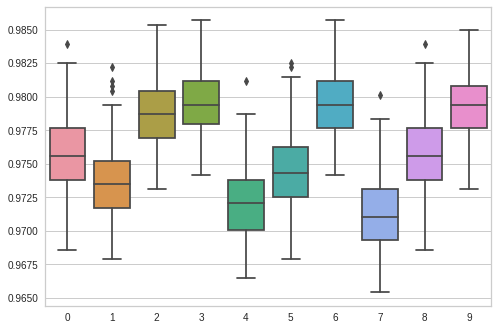

In [ ]:
import seaborn as sns

sns.boxplot(data=acuracia_modelos_lr.T);

Com isso, é possível ver que o melhor modelo foi o modelo 3.

In [ ]:
results_lr.best_params_

{'C': 6,
 'max_iter': 50,
 'multi_class': 'ovr',
 'n_jobs': -1,
 'penalty': 'none',
 'random_state': 23,
 'solver': 'newton-cg',
 'tol': 1e-05}

In [ ]:
results_lr.best_score_

0.9794455173923253

##### Melhor Modelo

Melhor modelo obtido foi salvo como lr_model

In [ ]:
lr_model = LogisticRegression(C=6, max_iter=50, multi_class='ovr', n_jobs=-1, penalty = 'none', random_state = 23, solver = 'newton-cg', tol = 1e-05 )

##### Estimativas pontuais e intervalo de confiança da validação

In [ ]:
scoring=['accuracy', 'precision', 'recall', 'f1']

In [ ]:
from sklearn.model_selection import cross_validate

scores_lr=cross_validate(lr_model, X_train, y_train, cv=cv2,scoring=scoring)

In [ ]:
scores_lr.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

In [ ]:
scores_lr['test_accuracy'].mean()

0.9793896277166804

Para calcular os intervalos de confiança

In [ ]:
int_acuracia_lr, int_precisao_lr, int_recall_lr, int_f1_lr = define_confidence_interval(scores_lr['test_accuracy'], scores_lr['test_precision'], scores_lr['test_recall'], scores_lr['test_f1'], 0.95)

In [ ]:
error_tax_lr, error_tax_lower_interval_lr, error_tax_upper_interval_lr = error_tax_model(scores_lr, int_acuracia_lr)

Relatório de estimativas de validação

In [ ]:
print('Relatório referente a validação do Classificador de Regressão Logística \n')

print_validation_evaluation(scores_lr, int_acuracia_lr, int_precisao_lr, int_recall_lr, int_f1_lr, error_tax_lr, error_tax_lower_interval_lr, error_tax_upper_interval_lr)

Relatório referente a validação do Classificador de Regressão Logística 

Relatório de estimativas pontuais e intervalo de confiança na validação:


A acurácia obtida na validação foi de: 0.9794
O intervalo de confiança da acurácia obtida na validação foi de: (0.9789979117454857, 0.9797813436878751)


A taxa de erro obtida na validação foi de: 0.0206
O intervalo de confiança da acurácia obtida na validação foi de (0.02021865631212494, 0.02100208825451433)


A precisão obtida na validação foi de: 0.9377
O intervalo de confiança da precisão obtida na validação foi de: (0.9351953733945003, 0.9402719753353549)


A cobertura (recall) obtido na validação foi de: 0.8305
O intervalo de confiança do recall obtida na validação foi de: (0.8268485144370954, 0.8341762368929995)


O f1-score obtido na validação foi de: 0.8804
O intervalo de confiança do f1-score obtida na validação foi de: (0.8780367397297021, 0.8828380899104437)


#### Predição

Realizando a predição com o conjunto de teste (X_test)

In [ ]:
y_pred_lr = search_lr.predict(X_test)

##### Métricas de erro do teste

In [ ]:
acuracia_lr, precisao_lr, recall_lr, f1_score_lr, matriz_confusao_lr, error_lr = test_evaluation(y_test, y_pred_lr)

In [ ]:
print('Relatório referente ao teste do Classificador de Regressão Logística \n')

print_test_evaluation(y_test, y_pred_lr, error_lr)

Relatório referente ao teste do Classificador de Regressão Logística 

Relatório de estimativas pontuais no teste:


A acurácia obtida no teste foi de: 0.9777


A taxa de erro obtida no teste foi de: 0.0223


A precisão obtida no teste foi de: 0.9526


O recall obtido no teste foi de: 0.7957


O f1-score obtido no teste foi de: 0.8671




/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


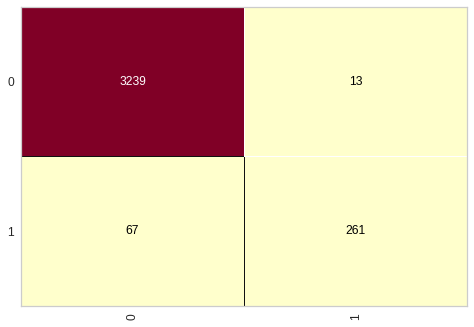

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

confusion_matrix_lr = ConfusionMatrix(lr_model)
confusion_matrix_lr.fit(X_train, y_train);
confusion_matrix_lr.score(X_test, y_test);

De forma estruturada, utilizamos a função classification_report:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.95      0.80      0.87       328

    accuracy                           0.98      3580
   macro avg       0.97      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



### Comparação entre os classificadores

Para fazer comparações entre os classificadores, foi utilizado o teste de Friedman utilizando o pacote scipy.stats

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.friedmanchisquare.html

In [ ]:
from scipy import stats

De acordo com a acurácia obtida na validação dos melhores modelos selecionados

In [ ]:
stats.friedmanchisquare(scores_gnb['test_accuracy'],scores_parzen['test_accuracy'],scores_lr['test_accuracy'])

FriedmanchisquareResult(statistic=593.0951585976627, pvalue=1.6256336811529216e-129)

Como p-valor (1.6256336811529216e-129) é muito menor do que 0.05, podemos rejeitar a hipótese nula de que a acurácia média entre modelos é semelhante.

De acordo com a precisão obtida na validação dos melhores modelos selecionados

In [ ]:
stats.friedmanchisquare(scores_gnb['test_precision'],scores_parzen['test_precision'],scores_lr['test_precision'])

FriedmanchisquareResult(statistic=518.8714524207016, pvalue=2.13056946399385e-113)

Como p-valor (2.13056946399385e-113) é muito menor do que 0.05, podemos rejeitar a hipótese nula de que a precisão média entre modelos é semelhante.

De acordo com o recall obtida na validação dos melhores modelos selecionados

In [ ]:
stats.friedmanchisquare(scores_gnb['test_recall'],scores_parzen['test_recall'],scores_lr['test_recall'])

FriedmanchisquareResult(statistic=552.575576430402, pvalue=1.0226762278752532e-120)

Como p-valor (1.0226762278752532e-120) é muito menor do que 0.05, podemos rejeitar a hipótese nula de que o recall médio entre modelos é semelhante.

De acordo com a f1-score obtida na validação dos melhores modelos selecionados

In [ ]:
stats.friedmanchisquare(scores_gnb['test_f1'],scores_parzen['test_f1'],scores_lr['test_f1'])

FriedmanchisquareResult(statistic=593.5763135946625, pvalue=1.2780304716473901e-129)

Como p-valor (1.2780304716473901e-129) é muito menor do que 0.05, podemos rejeitar a hipótese nula de que o f1-score médio entre modelos é semelhante.

Dessa forma, utilizando 4 métricas de erro e o teste estatístico de Friedman, podemos verificar que os 3 classificadores são diferentes entre si

Para verificar exatamente quais grupos são diferentes, foi aplicado o Nemenyyi post-hoc test como indicado por https://www.statology.org/nemenyi-test-python/

In [ ]:
pip install scikit-posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikit_posthocs as sp

Para a acurácia obtida pelos modelos, temos:

In [ ]:
acuracias = np.array([scores_gnb['test_accuracy'],scores_parzen['test_accuracy'],scores_lr['test_accuracy']])

sp.posthoc_nemenyi_friedman(acuracias.T)

,0,1,2
0,1.000,0.001,0.001
1,0.001,1.000,0.001
2,0.001,0.001,1.000


Interpretando as informações, temos que:

* o p-valor entre a acurácia refente ao classificador gnb e a acurácia referente ao classificador parzen foi de 0.001;
* o p-valor entre a acurácia refente ao classificador gnb e a acurácia referente ao classificador lr foi de 0.001;
* o p-valor entre a acurácia refente ao classificador parzen e a acurácia referente ao classificador lr foi de 0.001.

Como todos os p-valores foram menores do que 0.05, podemos dizer, com 95% de confiança de que todos os classificadores são estatisticamente diferentes quanto a acurácia

Para a precisão obtida pelos modelos, temos:

In [ ]:
precisoes = np.array([scores_gnb['test_precision'],scores_parzen['test_precision'],scores_lr['test_precision']])

sp.posthoc_nemenyi_friedman(precisoes.T)

,0,1,2
0,1.000,0.001,0.001
1,0.001,1.000,0.001
2,0.001,0.001,1.000


Interpretando as informações, temos que:

* o p-valor entre a precisão refente ao classificador gnb e a acurácia referente ao classificador parzen foi de 0.001;
* o p-valor entre a precisão refente ao classificador gnb e a acurácia referente ao classificador lr foi de 0.001;
* o p-valor entre a precisão refente ao classificador parzen e a acurácia referente ao classificador lr foi de 0.001.

Como todos os p-valores foram menores do que 0.05, podemos dizer, com 95% de confiança de que todos os classificadores são estatisticamente diferentes quanto a precisão

Para o recall obtida pelos modelos, temos:

In [ ]:
recalls = np.array([scores_gnb['test_recall'],scores_parzen['test_recall'],scores_lr['test_recall']])

sp.posthoc_nemenyi_friedman(recalls.T)

,0,1,2
0,1.000,0.001,0.001
1,0.001,1.000,0.001
2,0.001,0.001,1.000


Interpretando as informações, temos que:

* o p-valor entre o recall refente ao classificador gnb e a acurácia referente ao classificador parzen foi de 0.001;
* o p-valor entre o recall refente ao classificador gnb e a acurácia referente ao classificador lr foi de 0.001;
* o p-valor entre o recall refente ao classificador parzen e a acurácia referente ao classificador lr foi de 0.001.

Como todos os p-valores foram menores do que 0.05, podemos dizer, com 95% de confiança de que todos os classificadores são estatisticamente diferentes quanto ao recall

Para o f1-score obtida pelos modelos, temos:

In [ ]:
f1s = np.array([scores_gnb['test_f1'],scores_parzen['test_f1'],scores_lr['test_f1']])

sp.posthoc_nemenyi_friedman(f1s.T)

,0,1,2
0,1.000,0.001,0.001
1,0.001,1.000,0.001
2,0.001,0.001,1.000


Interpretando as informações, temos que:

* o p-valor entre ao f1-score refente ao classificador gnb e a acurácia referente ao classificador parzen foi de 0.001;
* o p-valor entre ao f1-score refente ao classificador gnb e a acurácia referente ao classificador lr foi de 0.001;
* o p-valor entre ao f1-score refente ao classificador parzen e a acurácia referente ao classificador lr foi de 0.001.

Como todos os p-valores foram menores do que 0.05, podemos dizer, com 95% de confiança de que todos os classificadores são estatisticamente diferentes quanto ao f1-score

A respeito do desempenho, foi possível observar que o classificador de regressão logística alcançou a melhor acurácia, taxa de erro, precisão e f1-score na validação enquanto o classificador Bayesiano Gaussiano atingiu uma melhor métrica de recall.